In [ ]:
!pip install pyswarm
import numpy as np
from scipy import optimize
import pandas as pd
from pyswarm import pso
import matplotlib.pyplot as plt

  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4479 sha256=af5a7abdb4ad5cfef14083d7d3c307dae23f492eb0052dc3b3aaa93398fd012a
  Stored in directory: /root/.cache/pip/wheels/ac/69/65/926e9c51b9fa99757cb43e8f6b74c5e6bb8b41a038b35c2db1
Successfully built pyswarm


In [ ]:
f = lambda x: 1/(x**2 -3*x +2)

In [ ]:
def generate_data(function, k):
    x = [3*item/1000 for item in range(k+1)]
    s = np.random.normal(0, 1, 1001)
    y = []
    for x_i, s_i in zip(x,s):
        if (function(x_i) < -100):
            y.append(-100 + s_i)
        if (-100 <= function(x_i) <= 100):
            y.append(function(x_i) + s_i)
        if (function(x_i) > 100):
            y.append(100 + s_i)
    return np.array([x, y])

In [ ]:
eps = 0.001
max_iterations = 1000
n = 1000
data = generate_data(f, n)

In [ ]:
def F_function(values):
    a,b,c,d = values
    x = data[0]
    return (a*x + b)/(x**2 + c*x + d)

In [ ]:
def D_function(values, shape = "float"):
    a,b,c,d = values
    x, y = data[0], data[1]
    F_val = F_function(values)
    return ((F_val - y)**2).sum()

In [ ]:
def D_derivative(values, shape='float'):
    x = data[0]
    y = data[0]
    a, b, c, d = values
    
    F_a_1 = x / (x ** 2 + c * x + d)
    F_b_1 = 1 / (x ** 2 + c * x + d)
    F_c_1 = - x * (a * x + b) / (x * (c + x) + d) ** 2
    F_d_1 = - (a * x + b) / (x * (c + x) + d) ** 2
    
    F_a_2 = (2 * x * (a * x + b) / (x * (c + x) + d) ** 2).sum()
    F_b_2 = (2 * (a * x + b) / (x * (c + x) + d) ** 2).sum()
    F_c_2 = (- 2 * x * (a * x + b) ** 2 / (x * (c + x) + d) ** 3).sum()
    F_d_2 = (- 2 * (a * x + b) ** 2 / (x * (c + x) + d) ** 3).sum()
    
    D_a = F_a_2 - (2 * y * F_a_1).sum()
    D_b = F_b_2 - (2 * y * F_b_1).sum()
    D_c = F_c_2 - (2 * y * F_c_1).sum()
    D_d = F_d_2 - (2 * y * F_d_1).sum()
    return [D_a, D_b, D_c, D_d]

In [ ]:
bounds = [(0,1), (0, 1), (0, 1), (0, 1)]
de = optimize.differential_evolution(D_function, bounds, tol=eps)
lm = optimize.least_squares(D_function, [-2., 1, 1, -2],jac = D_derivative)
nm = optimize.minimize(D_function, [-2., 1, 1, -2], method='Nelder-Mead',tol=1e-100)
da = optimize.dual_annealing(D_function, bounds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
pd.DataFrame([['Nelder-Mead', nm.nit, nm.nfev],
              ['Differential Evolution', de.nit, de.nfev],
              ['Levenberg-Marquardt', lm.nfev, lm.nfev],
              ['Simulated Annealing', da.nit, da.nfev]], columns = ['Method','num_iterations', 'func_evaluations'])

,Method,num_iterations,func_evaluations
0,Nelder-Mead,447,800
1,Differential Evolution,2,195
2,Levenberg-Marquardt,20,20
3,Simulated Annealing,1000,8366


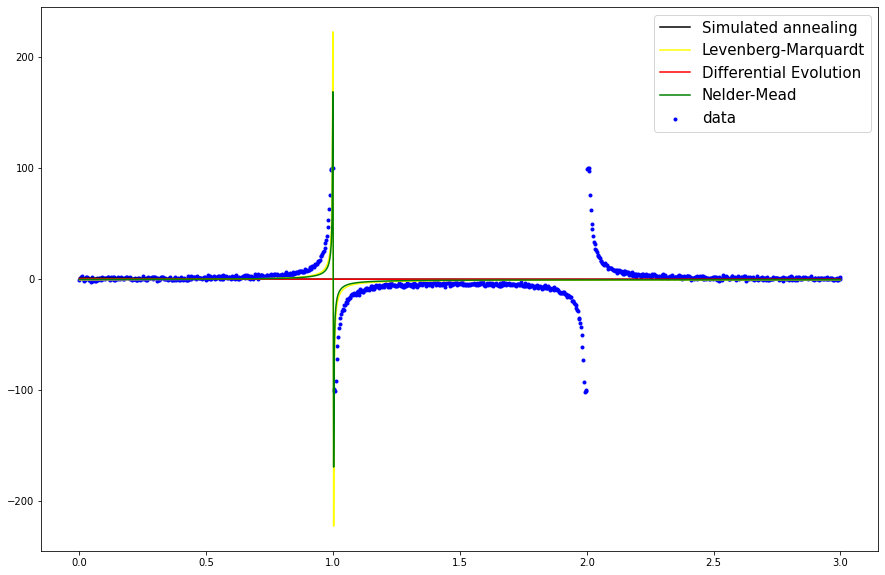

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(data[0], data[1], label = 'data', marker='.', color="blue")
plt.plot(data[0], F_function(da.x), color ="black", label ="Simulated annealing")
plt.plot(data[0], F_function(lm.x), color ="yellow", label ="Levenberg-Marquardt")
plt.plot(data[0], F_function(de.x), color ="red", label ="Differential Evolution")
plt.plot(data[0], F_function(nm.x), color ="green", label ="Nelder-Mead")
plt.legend(prop={'size': 15})

In [1]:
!pip install simanneal

import math
import random
from collections import defaultdict
from simanneal import Annealer
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining




11339 mile route:
New York, Atlanta, Chicago, Dallas, San Diego, Los Angeles, Seattle, San Francisco, Phoenix, Miami, Houston, Philadelphia, Washington, Detroit, Boston


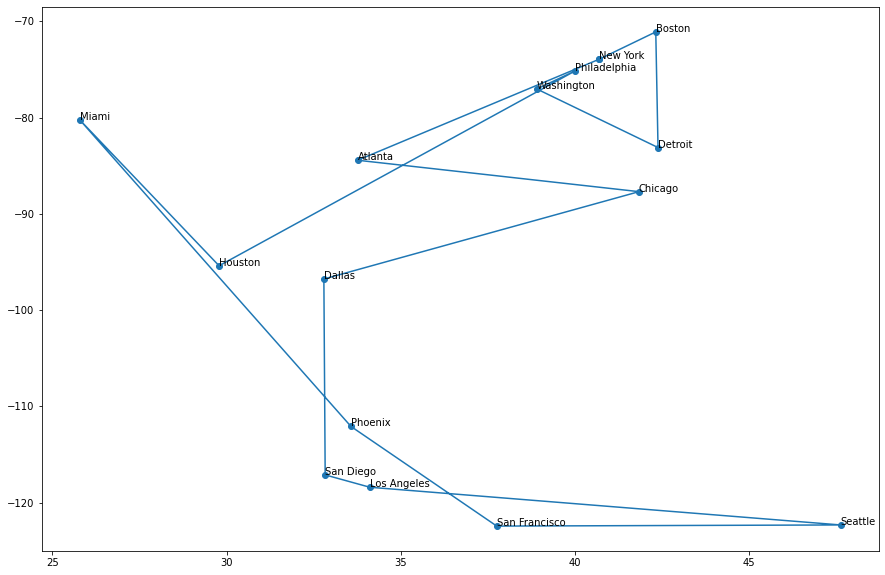

In [15]:
def distance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 3963  # radius of Earth (miles)
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R


class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e


if __name__ == '__main__':

    # latitude and longitude for the twenty largest U.S. cities
    cities = {
        'New York': (40.6943, -73.9249),
        'Los Angeles': (34.1139, -118.4068),
        'Chicago': (41.8373, -87.6862),
        'Miami': (25.7839, -80.2102),
        'Dallas': (32.7936, -96.7662),
        'Philadelphia': (40.0077, -75.1339),
        'Houston': (29.7863, -95.3889),
        'Atlanta': (33.7627, -84.4224),
        'Washington': (38.9047, -77.0163),
        'Boston': (42.3188, -71.0846),
        'Phoenix': (33.5722, -112.0891),
        'Seattle': (47.6211, -122.3244),
        'San Francisco': (37.7562, -122.443),
        'Detroit': (42.3834, -83.1024),
        'San Diego': (32.8312, -117.1225)
    }

    # initial state, a randomly-ordered itinerary
    init_state = list(cities)
    random.shuffle(init_state)

    # create a distance matrix
    distance_matrix = defaultdict(dict)
    for ka, va in cities.items():
        for kb, vb in cities.items():
            distance_matrix[ka][kb] = 0.0 if kb == ka else distance(va, vb)

    tsp = TravellingSalesmanProblem(init_state, distance_matrix)
    tsp.set_schedule(tsp.auto(minutes=0.2, steps=1))
    # since our state is just a list, slice is the fastest way to copy
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()


    while state[0] != 'New York':
        state = state[1:] + state[:1]  # rotate NYC to start

    print("\n")
    print("%i mile route:" % e)
    print(", ".join(state))

    latitude = [cities[city][0] for city in state] + [cities[state[0]][0]]
    longitude = [cities[city][1] for city in state] + [cities[state[0]][1]]

    plt.rcParams['figure.figsize'] = (15,10)
    fig, ax = plt.subplots()
    ax.plot(latitude, longitude, "-o", label=f"Path length: {int(e)}")

    for i, txt in enumerate(state):
      ax.annotate(txt, (latitude[i], longitude[i]))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining




7638 mile route:
New York, Philadelphia, Washington, Atlanta, Miami, Houston, Dallas, Phoenix, San Diego, Los Angeles, San Francisco, Seattle, Chicago, Detroit, Boston


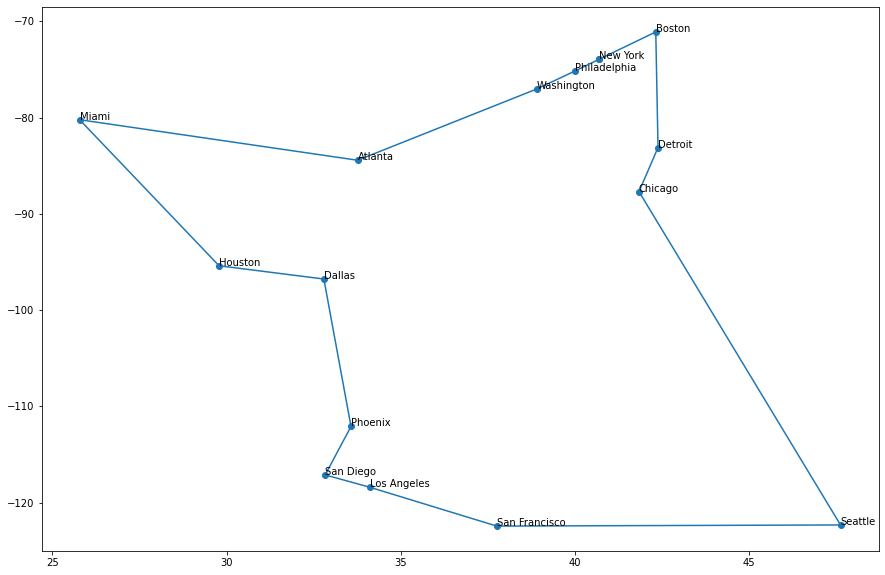

In [13]:
    tsp.set_schedule(tsp.auto(minutes=0.2))
    # since our state is just a list, slice is the fastest way to copy
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()

    while state[0] != 'New York':
        state = state[1:] + state[:1]  # rotate NYC to start

    print("\n")
    print("%i mile route:" % e)
    print(", ".join(state))

    latitude = [cities[city][0] for city in state] + [cities[state[0]][0]]
    longitude = [cities[city][1] for city in state] + [cities[state[0]][1]]

    plt.rcParams['figure.figsize'] = (15,10)
    fig, ax = plt.subplots()
    ax.plot(latitude, longitude, "-o", label=f"Path length: {int(e)}")

    for i, txt in enumerate(state):
      ax.annotate(txt, (latitude[i], longitude[i]))